<a href="https://colab.research.google.com/github/igorminerva/Morfologia/blob/main/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio.v2 as imageio
from IPython.display import Image

def se_array_to_coords(se):
    se = np.array(se)
    rows, cols = se.shape
    center = (rows // 2, cols // 2)
    coords = []
    for i in range(rows):
        for j in range(cols):
            if se[i, j]:
                coords.append((i - center[0], j - center[1]))
    return coords

def pad_limits(se_coords):
    dxs = [dx for dx, dy in se_coords]
    dys = [dy for dx, dy in se_coords]
    return max(0, -min(dxs)), max(0, max(dxs)), max(0, -min(dys)), max(0, max(dys))

# Imagem de teste
H, W = 120, 160
img_bin = np.zeros((H,W), dtype=bool)
img_bin[30:90, 40:120] = True
img_bin[50:56, 70:76] = False  # buraco interno
rng = np.random.default_rng(0)
img_bin[rng.integers(0,H,200), rng.integers(0,W,200)] = True  # ruído

# Elemento estruturante
se = np.ones((3,3), dtype=np.uint8)
se_coords = se_array_to_coords(se)



GIF 'erosao.gif' gerado com sucesso.


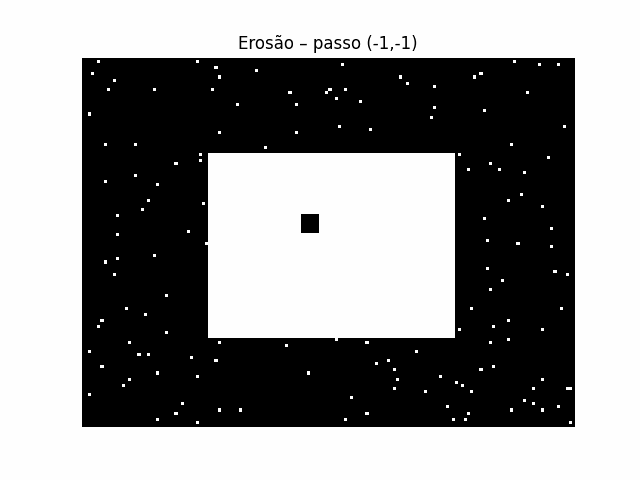

In [2]:
def erosion(img, se_coords):
    H, W = img.shape
    pad_top, pad_bottom, pad_left, pad_right = pad_limits(se_coords)
    p = np.pad(img, ((pad_top,pad_bottom),(pad_left,pad_right)), constant_values=False)
    out = np.ones_like(img, dtype=bool)
    frames = []
    for dx, dy in se_coords:
        out &= p[pad_top+dx:pad_top+dx+H, pad_left+dy:pad_left+dy+W]
        fig, ax = plt.subplots()
        ax.imshow(out, cmap="gray")
        ax.set_title(f"Erosão – passo ({dx},{dy})")
        ax.axis("off")
        fig.canvas.draw()
        frame = np.array(fig.canvas.buffer_rgba())
        frames.append(frame)

        plt.close(fig)
    imageio.mimsave("erosao.gif", frames, duration=1000)
    return out

erosion(img_bin, se_coords)
print("GIF 'erosao.gif' gerado com sucesso.")
Image(filename="erosao.gif")

GIF 'dilatacao.gif' gerado com sucesso.


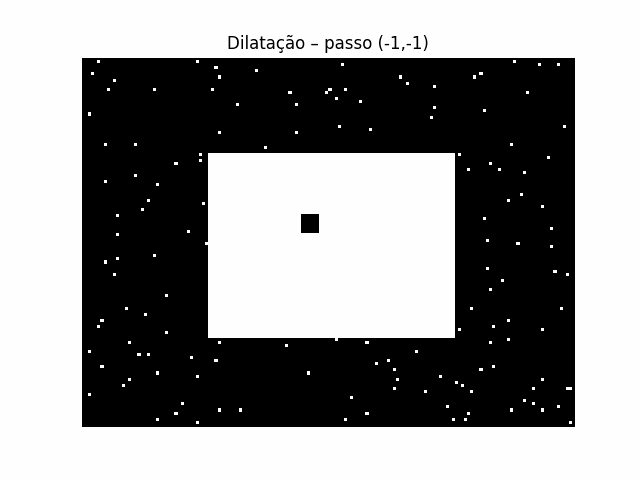

In [3]:
def dilation(img, se_coords):
    H, W = img.shape
    pad_top, pad_bottom, pad_left, pad_right = pad_limits(se_coords)
    p = np.pad(img, ((pad_top,pad_bottom),(pad_left,pad_right)), constant_values=False)
    out = np.zeros_like(img, dtype=bool)
    frames = []
    for dx, dy in se_coords:
        out |= p[pad_top+dx:pad_top+dx+H, pad_left+dy:pad_left+dy+W]
        fig, ax = plt.subplots()
        ax.imshow(out, cmap="gray")
        ax.set_title(f"Dilatação – passo ({dx},{dy})")
        ax.axis("off")
        fig.canvas.draw()
        frame = np.array(fig.canvas.buffer_rgba())
        frames.append(frame)
        plt.close(fig)
    imageio.mimsave("dilatacao.gif", frames, duration=1000)
    return out

dilation(img_bin, se_coords)
print("GIF 'dilatacao.gif' gerado com sucesso.")
Image(filename="dilatacao.gif")

GIF 'abertura.gif' gerado com sucesso.


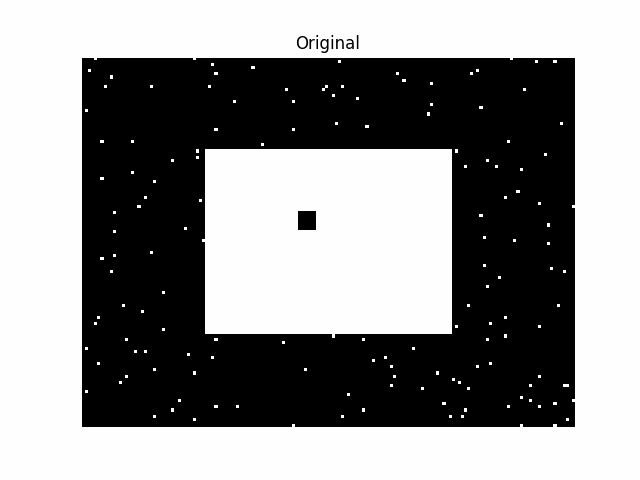

In [10]:
def opening(img, se_coords):
    er = erosion(img, se_coords)
    di = dilation(er, se_coords)
    return di

frames = []
for step, op in [("Original", img_bin),
                 ("Erosão", erosion(img_bin, se_coords)),
                 ("Dilatação", dilation(img_bin, se_coords))]:
    fig, ax = plt.subplots()
    ax.imshow(np.array(op, dtype=np.uint8), cmap="gray")

    ax.set_title(step)
    ax.axis("off")
    fig.canvas.draw()
    frame = np.array(fig.canvas.buffer_rgba())
    frames.append(frame)
    plt.close(fig)

imageio.mimsave("abertura.gif", frames, duration=1000)
print("GIF 'abertura.gif' gerado com sucesso.")
Image(filename="abertura.gif")

GIF 'fechamento.gif' gerado com sucesso.


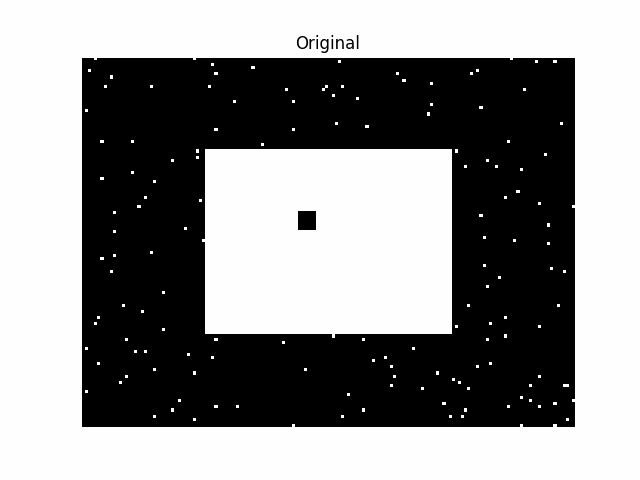

In [11]:
def closing(img, se_coords):
    di = dilation(img, se_coords)
    er = erosion(di, se_coords)
    return er

frames = []
for step, op in [("Original", img_bin),
                 ("Dilatação", dilation(img_bin, se_coords)),
                 ("Erosão", erosion(img_bin, se_coords))]:
    fig, ax = plt.subplots()
    ax.imshow(np.array(op, dtype=np.uint8), cmap="gray")
    ax.set_title(step)
    ax.axis("off")
    fig.canvas.draw()
    frame = np.array(fig.canvas.buffer_rgba())
    frames.append(frame)
    plt.close(fig)

imageio.mimsave("fechamento.gif", frames, duration=1000)
print("GIF 'fechamento.gif' gerado com sucesso.")
Image(filename="fechamento.gif")


GIF 'gradiente.gif' gerado com sucesso.


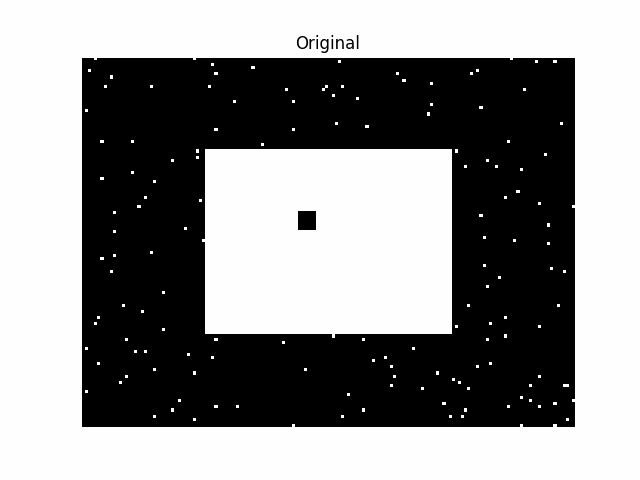

In [12]:
def gradient(img, se_coords):
    d = dilation(img, se_coords)
    e = erosion(img, se_coords)
    return np.logical_xor(d, e)

frames = []
for step, op in [("Original", img_bin),
                 ("Dilatação", dilation(img_bin, se_coords)),
                 ("Erosão", erosion(img_bin, se_coords)),
                 ("Gradiente", gradient(img_bin, se_coords))]:
    fig, ax = plt.subplots()
    ax.imshow(op, cmap="gray")
    ax.set_title(step)
    ax.axis("off")
    fig.canvas.draw()
    frame = np.array(fig.canvas.buffer_rgba())
    frames.append(frame)
    plt.close(fig)

import imageio.v2 as imageio
imageio.mimsave("gradiente.gif", frames, duration=1000)
print("GIF 'gradiente.gif' gerado com sucesso.")
Image(filename="gradiente.gif")

GIF 'borda_interna.gif' gerado com sucesso.


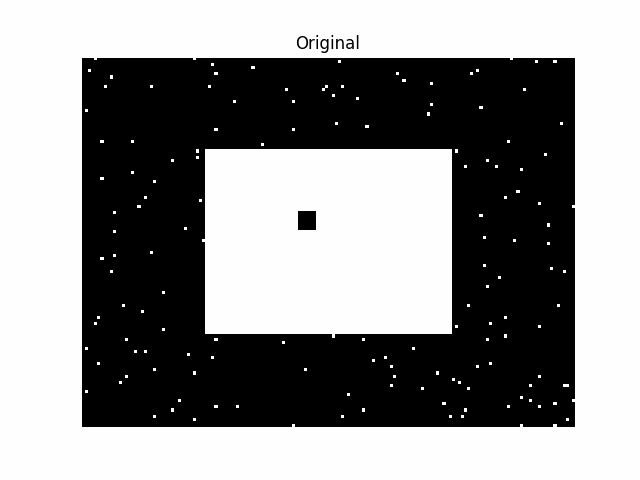

In [13]:
def internal_border(img, se_coords):
    er = erosion(img, se_coords)
    return img & (~er)

frames = []
for step, op in [("Original", img_bin),
                 ("Erosão", erosion(img_bin, se_coords)),
                 ("Borda Interna", internal_border(img_bin, se_coords))]:
    fig, ax = plt.subplots()
    ax.imshow(op, cmap="gray")
    ax.set_title(step)
    ax.axis("off")
    fig.canvas.draw()
    frame = np.array(fig.canvas.buffer_rgba())
    frames.append(frame)
    plt.close(fig)

imageio.mimsave("borda_interna.gif", frames, duration=1000)
print("GIF 'borda_interna.gif' gerado com sucesso.")
Image(filename="borda_interna.gif")

GIF 'borda_externa.gif' gerado com sucesso.


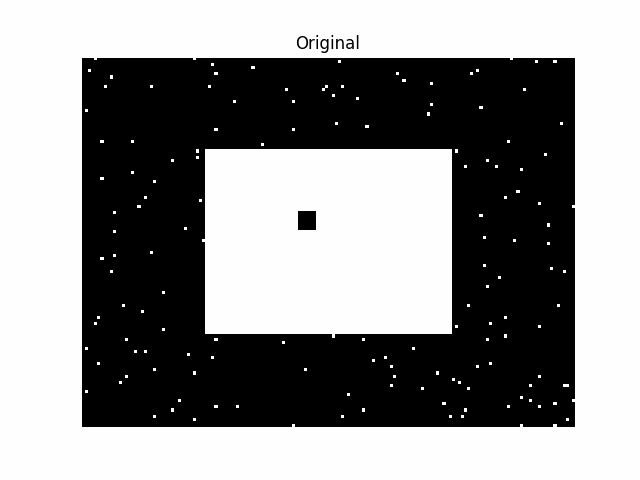

In [14]:
def external_border(img, se_coords):
    di = dilation(img, se_coords)
    return di & (~img)

frames = []
for step, op in [("Original", img_bin),
                 ("Dilatação", dilation(img_bin, se_coords)),
                 ("Borda Externa", external_border(img_bin, se_coords))]:
    fig, ax = plt.subplots()
    ax.imshow(op, cmap="gray")
    ax.set_title(step)
    ax.axis("off")
    fig.canvas.draw()
    frame = np.array(fig.canvas.buffer_rgba())
    frames.append(frame)

    plt.close(fig)

imageio.mimsave("borda_externa.gif", frames, duration=1000)
print("GIF 'borda_externa.gif' gerado com sucesso.")
Image(filename="borda_externa.gif")